<a href="https://colab.research.google.com/github/benjaminbrown038/ECSE-6410-Pattern-Recognition-HW1/blob/main/ECSE_6410_Pattern_Recognition_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Classify Cats and Dogs


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
import zipfile

In [15]:
# Download dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url)

# Extract manually (safe for Colab)
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(path_to_zip))

# Define dataset paths
base_dir = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
cats_path = os.path.join(train_dir, "cats")
dogs_path = os.path.join(train_dir, "dogs")

print("✅ Dataset ready")
print("Cats:", cats_path)
print("Dogs:", dogs_path)


✅ Dataset ready
Cats: /root/.keras/datasets/cats_and_dogs_filtered/train/cats
Dogs: /root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [16]:
img_size = (128, 128)   # resize images
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)


In [17]:
def extract_hog_features(img_path):
    img = imread(img_path, as_gray=True)
    img_resized = resize(img, img_size)
    features, _ = hog(
        img_resized,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm="L2-Hys",
        visualize=True
    )
    return features

features, labels = [], []

# Limit dataset size for speed (e.g., 1000 each)
for file in os.listdir(cats_path)[:1000]:
    fpath = os.path.join(cats_path, file)
    features.append(extract_hog_features(fpath))
    labels.append(0)   # cat = 0

for file in os.listdir(dogs_path)[:1000]:
    fpath = os.path.join(dogs_path, file)
    features.append(extract_hog_features(fpath))
    labels.append(1)   # dog = 1

X = np.array(features)
y = np.array(labels)

print("Feature matrix shape:", X.shape)


Feature matrix shape: (2000, 8100)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
clf = LinearSVC(max_iter=5000)
clf.fit(X_train, y_train)

print("✅ Model trained")


✅ Model trained


In [20]:
y_pred = clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Train Accuracy: 1.0
Test Accuracy: 0.685


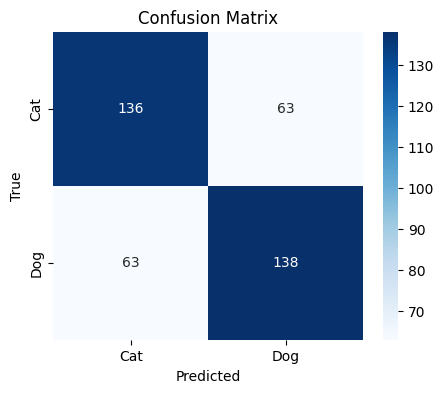

Classification Report:

              precision    recall  f1-score   support

         Cat       0.68      0.68      0.68       199
         Dog       0.69      0.69      0.69       201

    accuracy                           0.69       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.69      0.69      0.69       400



In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


Cat Example:


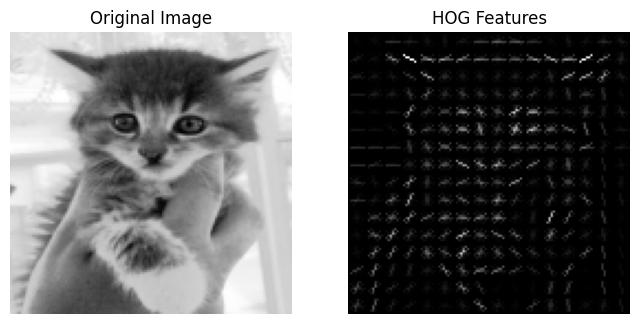

Dog Example:


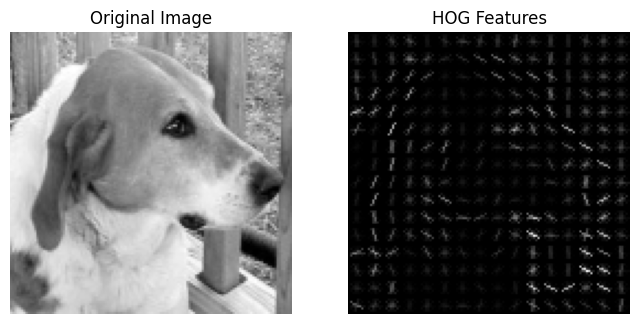

In [22]:
def show_hog_example(img_path):
    img = imread(img_path, as_gray=True)
    img_resized = resize(img, img_size)

    features, hog_image = hog(
        img_resized,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm="L2-Hys",
        visualize=True
    )
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(img_resized, cmap=plt.cm.gray)
    ax1.set_title("Original Image")
    ax1.axis("off")

    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title("HOG Features")
    ax2.axis("off")

    plt.show()

print("Cat Example:")
show_hog_example(os.path.join(cats_path, os.listdir(cats_path)[0]))

print("Dog Example:")
show_hog_example(os.path.join(dogs_path, os.listdir(dogs_path)[0]))


### Dataset Reference

1. https://www.kaggle.com/c/dogs-vs-cats/data